# Práctica 1: Aprendizaje automático

__Fecha de entrega: XXX de YYY de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 02__

__Nombres de los estudiantes: Jorge Arevalo Echevarria y Jesus Martin Moraleda__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

acidez fija
acidez volátil
ácido cítrico
azúcar residual
cloruros
dióxido de azufre libre
dióxido de azufre total
densidad
pH
sulfatos
alcohol

estas son las columnas del dataframe

In [32]:
import numpy as np
import pandas as pd
 
df = pd.read_csv("calidad_vinos.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [2]:
#analisis de los datos
#dfNum.describe(include='all')
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
#correlacion de las variables
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<AxesSubplot:title={'center':'fixed acidity'}>]], dtype=object)

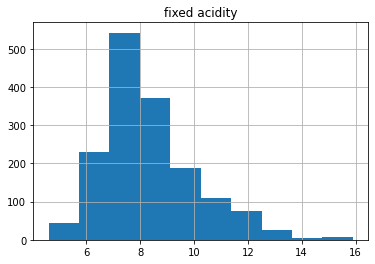

In [4]:
df.hist(column="fixed acidity")

La acidez fija es una agrupación de ácidos naturales procedentes de la uva o formados en el proceso de fermentación, puesto que el ácido tartárico es el más representativo se mide en base a él, unidades gramos/litro. En base al diagrama de cagas se estableció un máximo y mínimo de (15.900) y (4.600) respectivamente, el histograma de frecuencia ubicaba la mayor cantidad de datos en el intervalo [7, 9] en el cual se encuentra la media (8.31) y la mediana (7.9), presentan una desviación estándar de (1.741). La muestra se encuentra en los valores del primer cuartil (7.10000) y el tercer cuartil (9.2000) donde se encuentras mas muestras.
La media es 8.31 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

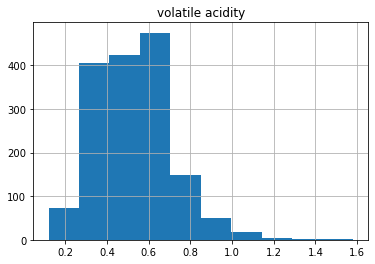

In [5]:
df.hist(column="volatile acidity")

En el caso de la acidez volátil, expresado en unidades gramo sobre litro [g/L], con valores máximo y mínimo, 1.1000 y 0.0800 respectivamente, corresponden al intervalo de acidez de la muestra y tenemos todos los datos en la tabla de arriba que nos describen la variable como en el caso de arriba. Cabe mencionar que este diagrama permite conocer que existe una gran cantidad de datos aberrantes mayoritariamente ubicados a la derecha lo cual evidencia una asimetría a la derecha.
La media es 0.527821 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'citric acid'}>]], dtype=object)

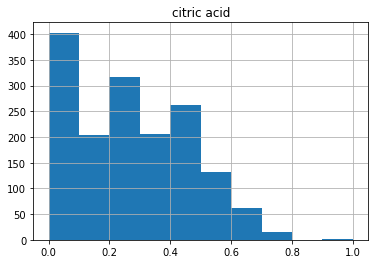

In [7]:
df.hist(column="citric acid")

 El ácido cítrico normalmente se encuentra abundante en la mayoría de frutas excepto en las uvas, en concentraciones de alrededor de 0.2 a 0.4 g/l. cabe mencionar que este diagrama permite conocer que existe una gran cantidad de datos aberrantes mayoritariamente ubicados a la derecha lo cual evidencia una asimetría a la derecha.
 La media es 0.270976 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'residual sugar'}>]], dtype=object)

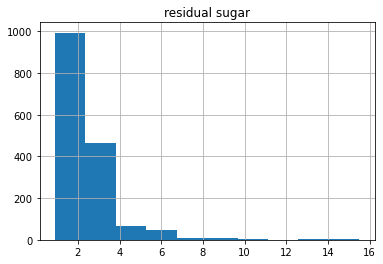

In [9]:
df.hist(column="residual sugar")

El vino dado sus características derivadas de la fermentación alcohólica, posee una fuente de azucares llamados azucares residuales, que lo pueden clasificar en seco (0-9), semiseco (9-18), semidulce (18-50) y dulce (mayor 50). Esta característica se la mide en gramos litros [g/L], y en base a la muestra
La media es 2.538806 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'chlorides'}>]], dtype=object)

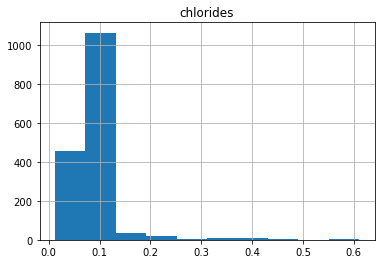

In [10]:
df.hist(column="chlorides")

Una de los principales componentes de las sales en el vino son los cloruros, las sales minerales en el vino producen en organismo placer organoléptico, favorecen la hidratación, resalta sabores de los alimentos. Al hacer uso del diagrama de cajas nos permite que la mayor cantidad de datos aberrantes están a la derecha.
La media es 0.087467 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'free sulfur dioxide'}>]],
      dtype=object)

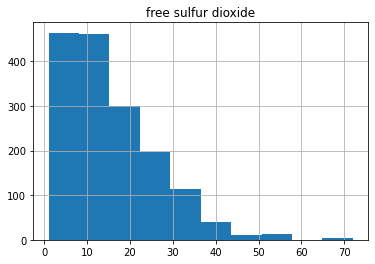

In [11]:
df.hist(column="free sulfur dioxide")

En el proceso de fermentación alcohólica, al producirse alcohol, este mismo es propenso a oxidarse, dando un sabor amargo similar al del vinagre haciendo del vino, no apto para el consumo, por ello en los viñedos se ingresa dióxido de azufre para que este consuma oxígeno y evite la oxidación, el término “libre” hace referencia a los bisulfitos, y se miden en partes por millón (ppm). La gráfica del diagrama de cajas, está ligeramente sesgado hacia la derecha.
La media es 15.874922 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'total sulfur dioxide'}>]],
      dtype=object)

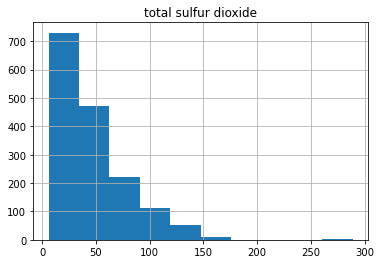

In [12]:
df.hist(column="total sulfur dioxide")

El dióxido de azufre a lo largo de los años ha sido utilizado como conservante. En el vino es utilizado por su actividad antioxidante y también por sus cualidades antimicrobianas, además evita la formación de defectos en el vino, sin embargo, el uso del dióxido de azufre genera efectos adversos a determinados consumidores. En Europa la legislación indica que se debe utilizar un máximo de 210 mg/L en vinos blancos. 
La media es 46.467792 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'density'}>]], dtype=object)

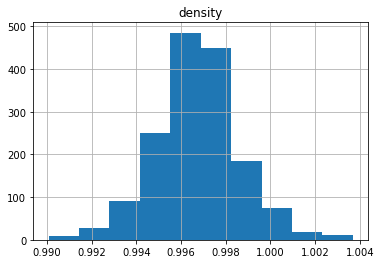

In [13]:
df.hist(column="density")

Una propiedad muy empleada en la ingeniería es la densidad, y en específico, al momento de obtener la densidad de vino, se aprecia que es muy cercana a la densidad del agua 1 g/ml, por ello el histograma, resulto muy concentrado en el intervalo [0.99, 1.00].
La media es 0.996747 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

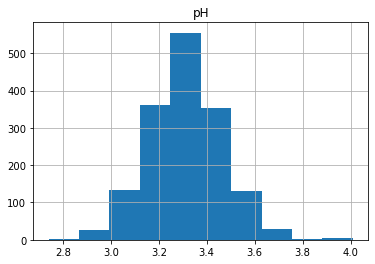

In [14]:
df.hist(column="pH")

El PH es la unidad de medida de la acidez del vino, esta se distribuye en una escala que va desde 0 muy acido hasta 14 muy alcalino siendo 7 un punto neutro. La mayoría de los vinos blancos suelen estar entre 3 y 3.3 puesto que el vino es una bebida acida y por lo general se intenta que los vinos no tengan un PH cercano o superior a 4.
La media es 3.311113 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'sulphates'}>]], dtype=object)

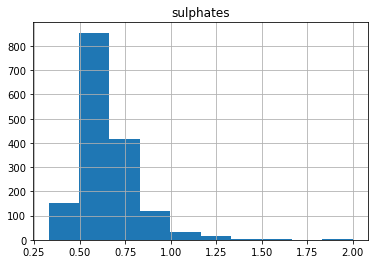

In [15]:
df.hist(column="sulphates")

Los sulfatos son especies químicas, producto de la fermentación alcohólica, provenientes de las frutas que al final derivan en sulfitos. Esta sustancia funciona como conservante de los aromas del vino y eliminación de bacterias.
La media es 0.658149 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

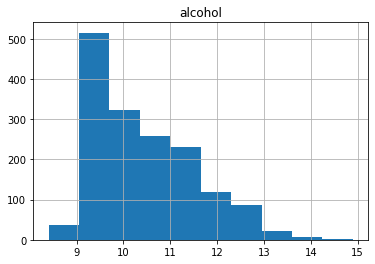

In [16]:
df.hist(column="alcohol")

El vino al ser una bebida fermentada, posee una graduación alcohólica entre los 3.5 y 15 grados. Pero habitualmente los vinos blancos están entre 10 y 12 grados de alcohol. Cada grado es un 1% de alcohol. 
La media es 10.422983 ya que es uno de los campos que mas nos queremos fijar.

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

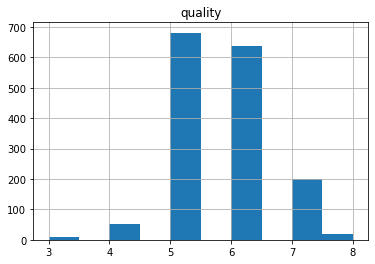

In [17]:
df.hist(column="quality")

De las variables presentadas, la calidad representa una comparación puntual, son valores enteros, su análisis será el más sencillo de ellos, el histograma revela que la mayoría de observaciones, poseen una calificación de 5 y luego 6, denotando que la mayoría de vinos tienen una calidad aceptable y muy pocos llevan una calificación de 8.
La media es 5.636023 ya que es uno de los campos que mas nos queremos fijar.

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media(viendo las graficas observamos que podria ser citric acid), y aquella que está más concentrada en torno a la media(viendo las graficas observamos que podria ser residual sugar y chlorides).

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

## Importante:

A partir de aqui he tenido problemas, por que no he sabido añadir la columna precio, ni la he visto en el archivo.csv, ni he sabido como generarla con nuevos datos, aun q fueran aleatorios.
Despues por este motivo no he sabido relacionar la variable de salida precio para luego predecir resultados sobre esa variable

In [29]:
df1 = df.copy()
df1.loc['precio'] = 5
print(df1)

        fixed acidity  volatile acidity  citric acid  residual sugar  \
0                 7.4             0.700         0.00             1.9   
1                 7.8             0.880         0.00             2.6   
2                 7.8             0.760         0.04             2.3   
3                11.2             0.280         0.56             1.9   
4                 7.4             0.700         0.00             1.9   
...               ...               ...          ...             ...   
1595              5.9             0.550         0.10             2.2   
1596              6.3             0.510         0.13             2.3   
1597              5.9             0.645         0.12             2.0   
1598              6.0             0.310         0.47             3.6   
precio            5.0             5.000         5.00             5.0   

        chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0           0.076                 11.0                  

In [27]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000
mean,8.314438,0.527491,0.270806,2.537219,0.087412,15.865000,46.438750,0.996124,3.309044,0.657738,10.416469,5.63250
std,1.752935,0.179489,0.194858,1.410915,0.047101,10.464414,32.905549,0.024990,0.175136,0.170251,1.096739,0.81952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.00000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.00000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.00000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.00000


In [30]:
df1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
correl = df.corr()
correl

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Toma valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.

Es independiente de las escalas en las que se midan las variables.

No varía si se aplican transformaciones a las variables.

No tiene en consideración que las variables sean dependientes o independientes.

El coeficiente de correlación de Pearson no equivale a la pendiente de la recta de regresión.

Es sensible a outliers, por lo que se recomienda, en caso de poder justificarlos, excluirlos antes de realizar el cálculo.

El coeficiente de correlación de Pearson mide la asociación lineal entre variables. Su valor se puede interpretar así:
    +1 : Correlación positiva completa
    +0,8 : Fuerte correlación positiva
    +0,6 : Correlación positiva moderada
    0 : sin correlación alguna
    -0,6 : Correlación negativa moderada
    -0,8 : Fuerte correlación negativa
    -1 : Correlación negativa completa

In [37]:
#print('Correlación Pearson: ', df1.corr(df1, method='pearson'))
print('Correlación Pearson: ', df1['fixed acidity'].corr(df1['density'], method='pearson'))

Correlación Pearson:  -0.03504067747886901


In [40]:
corr_matrix = df1.corr(method='pearson')
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.242222     0.548809   
volatile acidity          -0.242222          1.000000    -0.125650   
citric acid                0.548809         -0.125650     1.000000   
residual sugar             0.112460          0.024729     0.145246   
chlorides                 -0.010990          0.513290     0.546933   
free sulfur dioxide       -0.152330         -0.022674    -0.065595   
total sulfur dioxide      -0.111496          0.048134     0.014007   
density                   -0.035041          0.530009     0.524735   
pH                        -0.670592          0.331987    -0.309869   
sulphates                  0.128237          0.099348     0.505046   
alcohol                   -0.055093         -0.237075     0.027681   
quality                    0.124825         -0.341620     0.183248   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Debido a que estamos trabajando con una gran variedad de datos que recogen mediciones de datos muy diversos y sobre distintas escalas es necesario adaptar los datos para que ninguna variable haga que el modelo pierda toda la precisión que podría llegar a tener

In [54]:
from sklearn.preprocessing import StandardScaler
# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df1)
data_scaled=scaler_x.transform(df1)
df_scaled = pd.DataFrame(data_scaled)
#target_scaled=scaler_x.transform(df1.to_numpy().reshape(-1, 1))

# Y también transformamos la variable de salida
#scaler_y = StandardScaler()
#scaler_y.fit(data['precio'].to_numpy().reshape(-1, 1))
# Como es una sola variable es necesario ponerlo en modo columna
#target_scaled=scaler_y.transform(data['precio']..to_numpy().reshape(-1, 1))


ValueError: X has 1 features, but StandardScaler is expecting 12 features as input.

In [43]:
data_scaled

array([[-5.26733994e-01,  8.02826080e-01, -1.20278855e+00, ...,
        -5.01365418e-01, -9.49704416e-01, -7.87423696e-01],
       [-2.97110837e-01,  1.65596672e+00, -1.20278855e+00, ...,
         9.51283250e-02, -5.77122918e-01, -7.87423696e-01],
       [-2.97110837e-01,  1.08720629e+00, -1.02715491e+00, ...,
        -5.39951107e-02, -5.77122918e-01, -7.87423696e-01],
       ...,
       [-1.38782083e+00,  5.42144217e-01, -6.75887634e-01, ...,
         2.44251761e-01, -2.04541421e-01, -7.87423696e-01],
       [-1.33041504e+00, -1.04564531e+00,  8.60906694e-01, ...,
        -4.28729878e-03,  5.40621574e-01,  4.51394311e-01],
       [-1.90447293e+00,  2.11834081e+01,  2.07514161e+01, ...,
         2.15689031e+01, -5.04810089e+00, -7.87423696e-01]])

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [47]:
#Perceptrón de 1 capa oculta y 250 neuronas
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 6) 

cv_scores_mean1=[]
cv_scores_std1=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp1=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, df_scaled, cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean1.append(scores1.mean())
    cv_scores_std1.append(scores1.std())

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 596, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 596, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positio

In [49]:
#Perceptrón de 2 capas ocultas y 125 neuronas cada una
regul_param_range = 10.0 ** -np.arange(1, 6) 

cv_scores_mean2=[]
cv_scores_std2=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp2=MLPRegressor(hidden_layer_sizes=(125,125, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores2 = cross_val_score(mlp2, df_scaled, cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores2.mean())
    cv_scores_std2.append(scores2.std())

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 596, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 596, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positio

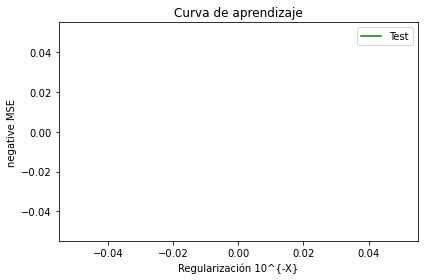

In [52]:
#Aprendizaje del primer perceptrón
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
import matplotlib.pyplot as plt
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean1, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean1)-np.array(cv_scores_std1)
upper_limit=np.array(cv_scores_mean1)+np.array(cv_scores_std1)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


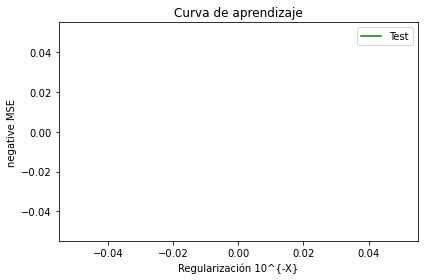

In [55]:
#Aprendizaje del segundo perceptrón
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean2)-np.array(cv_scores_std2)
upper_limit=np.array(cv_scores_mean2)+np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El modelo con capas ocultas es mejor(segun la teoria, aunque no me llegue a mostrar en las graficas los datos)

El modelo de las capas ocultas es mejor ya que aunque haya un menir número de neuronas, hay un número superior de conexiones, esto nos ayuda a descubrir más patrones y conexiones entre variables. Con una sola capa de neuronas muchas de estas relaciones no se conseguirán. Esto puede llegar a ser un problema, ya que puede crear overfitting o identificar relaciones que no existen

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [57]:
#Visualización del segundo modelo (el mejor)
from sklearn.model_selection import cross_val_predict

mlp2=MLPRegressor(hidden_layer_sizes=(125,125, ), activation='relu', solver='adam', alpha=1, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)

predicts_scaled2 = cross_val_predict(mlp2, df_scaled, target_scaled.ravel(), cv=5)

# escalamos las predicciones para que estén en la escala original
predicts2=scaler_y.inverse_transform(predicts_scaled2)

# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(df['precio'] - predicts2))

plt.title('Distribución del error en valor absoluto')
plt.show()

NameError: name 'target_scaled' is not defined

NameError: name 'data' is not defined

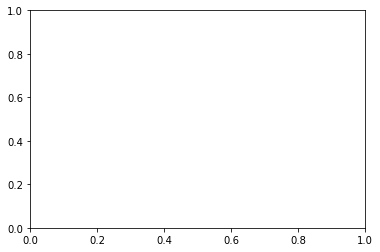

In [58]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df['precio'], predicts2) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df['precio'], data['precio'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

In [ ]:
#Visualización del primer modelo (el peor)
from sklearn.model_selection import cross_val_predict

mlp1=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=1, batch_size=100, 
    learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)

predicts_scaled1 = cross_val_predict(mlp1, df_scaled, target_scaled.ravel(), cv=5)

# escalamos las predicciones para que estén en la escala original
predicts1=scaler_y.inverse_transform(predicts_scaled1)
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(df['precio'] - predicts1))

plt.title('Distribución del error en valor absoluto')
plt.show()

In [ ]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(data['GDP (USD per capita)'], predicts1) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(data['GDP (USD per capita)'], data['GDP (USD per capita)'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
#MAE del mlp1
mae(data['precio'], predicts1)

In [ ]:
#MAE del mlp2
mae(data['precio'], predicts2)